# Problem Statement
BoomBikes, a US bike-sharing provider, has faced revenue drops due to the COVID-19 pandemic. To recover, they aim to understand the factors affecting bike demand post-lockdown. They seek to identify significant variables predicting bike demand and how well these variables describe the demand.

## Business Goal:
Model the demand for shared bikes using available independent variables. This model will help management understand demand dynamics and adjust business strategies to meet customer expectations and capture new market opportunities.

In [2502]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Data Processing

In [2503]:
# Load the data
bikeModel_df = pd.read_csv('day.csv')
print(bikeModel_df.shape)
bikeModel_df.head()
#Data has 731 rows and 16 columns

(730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [2504]:
# check for missing values and data types
bikeModel_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [2505]:
# check for mean, median, mode, min, max, std, variance
bikeModel_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Cleaning
csv file will have the following data
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [2506]:
#will try to remove the coloumns which are not required
#instant is just a serial number
#dteday is the date which is not required as we have yr and mnth coloumns

#check for null missing values
bikeModel_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [2507]:
#will try to remove the coloumns which are not required
#instant is just a serial number
#dteday is the date which is not required as we have yr and mnth coloumns
#casual and registered are not required as we have cnt which is the sum of casual and registered
bikeModel_df.drop(['instant','dteday', 'casual', 'registered'],axis=1,inplace=True)

#after dropping the coloumns, check the data
bikeModel_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [2508]:
#check for unique values in the data
bikeModel_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

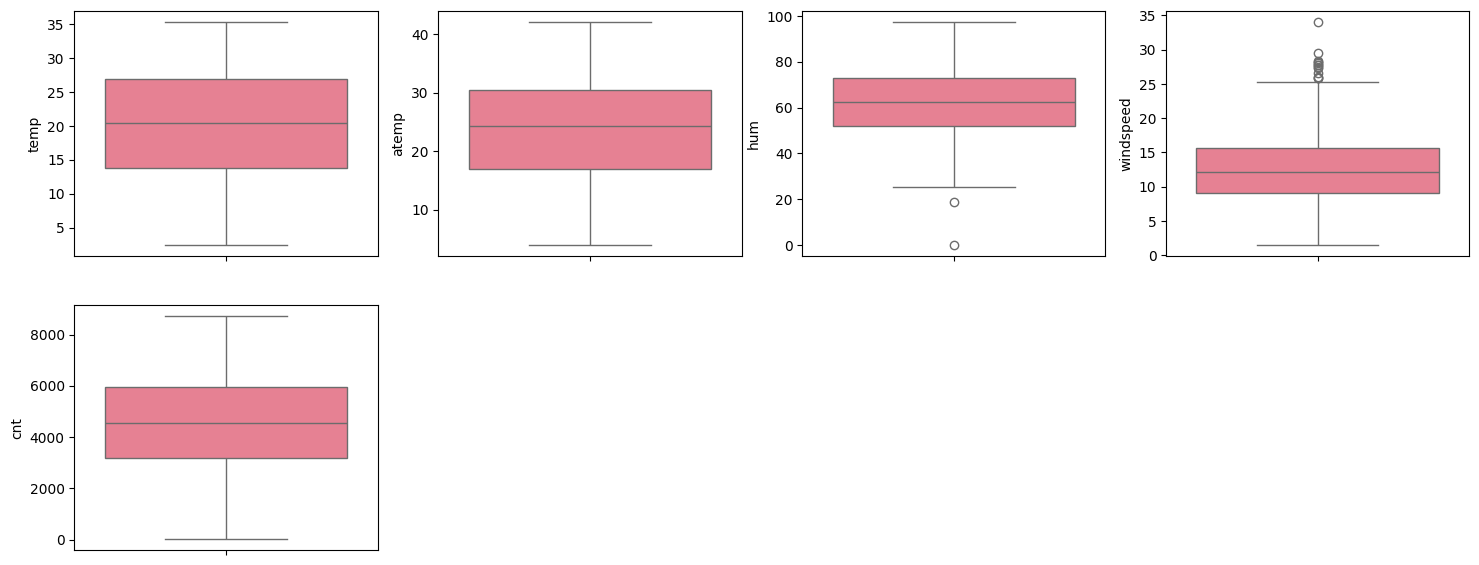

In [2509]:
#check for outliers for the non categorical data
cols = ['temp','atemp','hum','windspeed','cnt']
plt.figure(figsize=(18,7))
i=1
for col in cols:
    plt.subplot(2,4,i)
    sns.boxplot(y=col,  data=bikeModel_df)
    i+=1
#There are no outliers in the data

## EDA Exploratory Data Analysis
This will help us in dealing with multicolinerity variable and help us removing redundant variable

In [2510]:
bikeModel_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

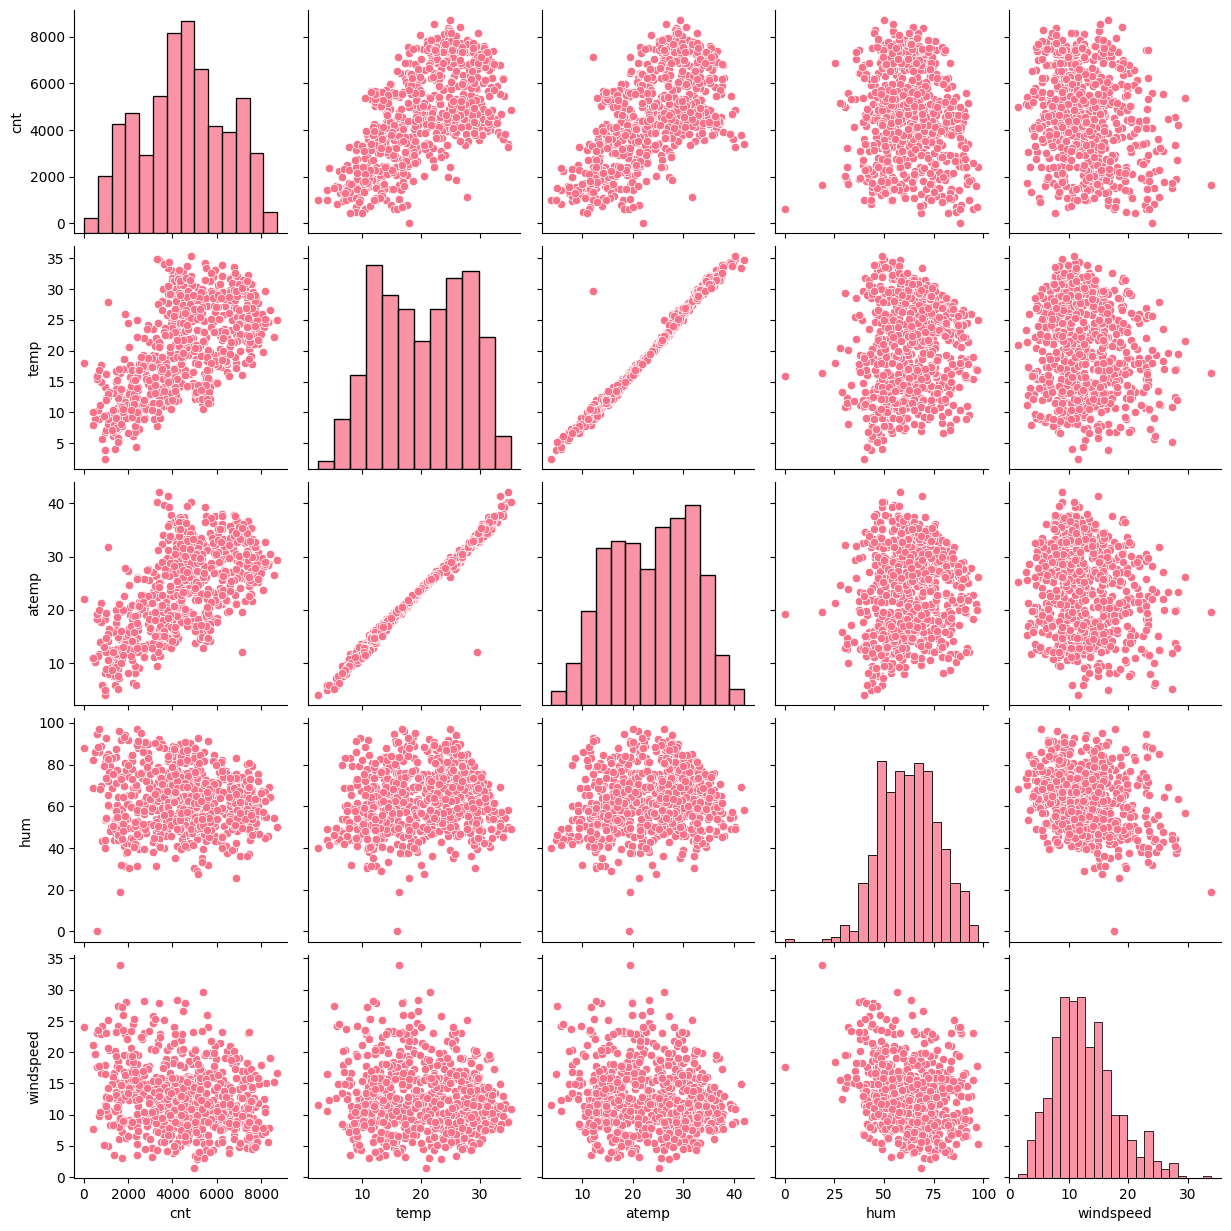

In [2511]:
# Drawing pairplot to check the linear relationship between the variables
#vissualing the relationship between the numerical variables
bikeModel_df.columns
sns.pairplot(data=bikeModel_df, vars=['cnt','temp', 'atemp', 'hum', 'windspeed'])
#cnt is the target variable
#temp and atemp are highly correlated
#casual and registered are highly correlated
#temp and atemp are positively correlated with cnt
#hum and windspeed are negatively correlated with cnt

In [2512]:
#changing categorical data which were primarily numeric to more meaningful one
bikeModel_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
bikeModel_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)
bikeModel_df.mnth = bikeModel_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
bikeModel_df.weekday = bikeModel_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
print(bikeModel_df.head())



   season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring   0  jan        0     sat           0   moderate  14.110847   
1  spring   0  jan        0     sun           0   moderate  14.902598   
2  spring   0  jan        0     mon           1       good   8.050924   
3  spring   0  jan        0     tue           1       good   8.200000   
4  spring   0  jan        0     wed           1       good   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600  


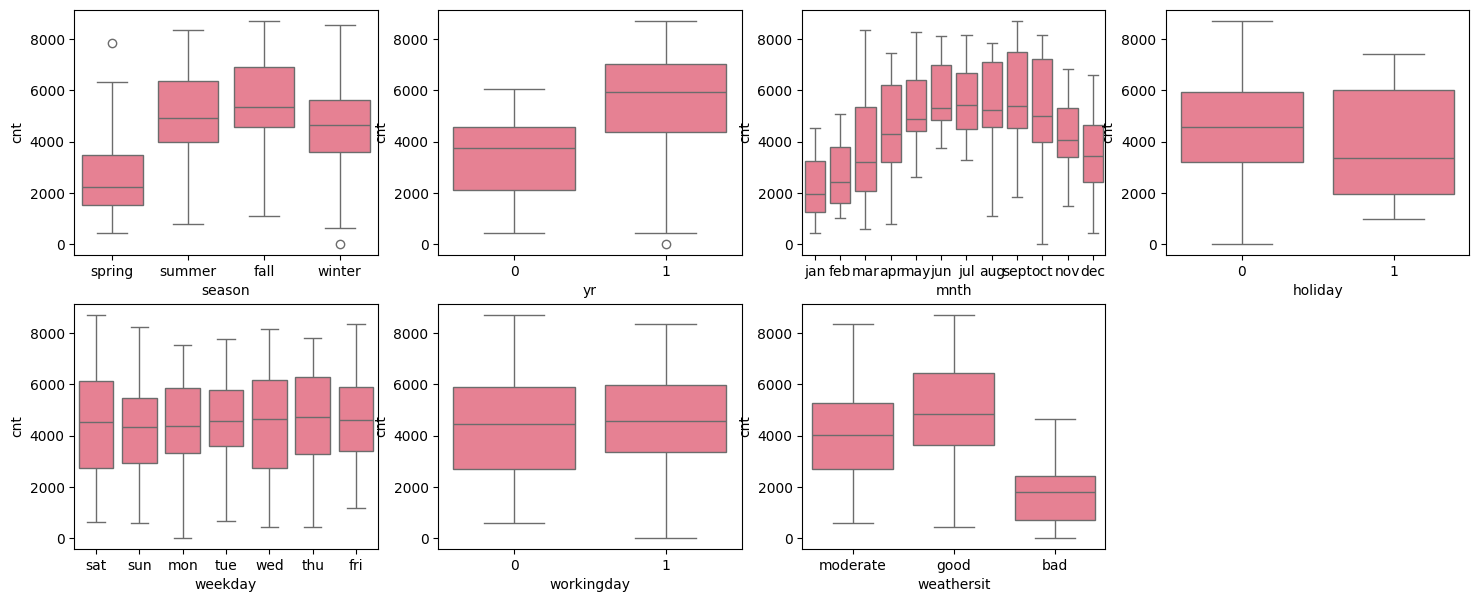

In [2513]:
#Now will going to use Box plot to visualise the relationship between the categorical variables and the target variable
#target variable is cnt
#check for categorical data

# Change the color of the boxplot for each category
cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
plt.figure(figsize=(18,7))
i=1
for col in cols:
    plt.subplot(2,4,i)
    sns.boxplot(x=col,y='cnt', data=bikeModel_df)
    i+=1
#There are no outliers in the data
#Conclusion from the box plot
#1. Bike sharing count is more in fall and summer season
#2. Bike sharing count is more in 2019 compared to 2018
#3. Bike sharing count is more in the month of September and June
#4. Bike sharing count is more on non holiday days
#5. Bike sharing count is more on weekdays compared to weekends
#6. Bike sharing count is more on working days compared to non working days
#7. Bike sharing count is more on good weather days compared to bad weather days


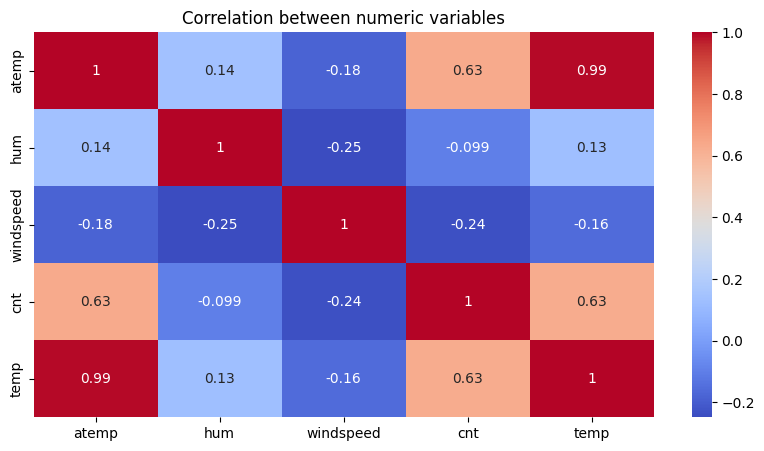

In [2514]:
#Check the correlation between the numeric variables

numeric_cols = ['atemp', 'hum', 'windspeed', 'cnt', 'temp']
plt.figure(figsize=(10,5))
plt.title('Correlation between numeric variables')
sns.heatmap(bikeModel_df[numeric_cols].corr(),annot=True, cmap='coolwarm')
plt.show()


In [2515]:
bikeModel_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


# Data Preperation for Linear Regression

In [2516]:
# Creating dummy variables for the categorical variables having values more than 2
bikeModel_df = pd.get_dummies(data=bikeModel_df, columns=['season', 'mnth', 'weekday'], drop_first=True)
bikeModel_df = pd.get_dummies(data=bikeModel_df,columns=["weathersit"])
bikeModel_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,False,True,False,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,False,True,False,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,...,False,True,False,False,False,False,False,False,True,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,...,False,False,False,False,False,True,False,False,True,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,...,False,False,False,False,False,False,True,False,True,False


In [2517]:
bikeModel_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

### Splitting data into train and test data

In [2518]:
bikeModel_df.shape

(730, 31)

In [2519]:
#target variable is cnt
target_var = bikeModel_df['cnt']
#other variable are the features
features = bikeModel_df.drop('cnt', axis=1)

#Splitting the data into train and test into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(features, target_var, test_size=0.3, random_state=42)


In [2520]:
#size of the train and test data
print(X_train.shape)
print(X_test.shape)

(511, 30)
(219, 30)


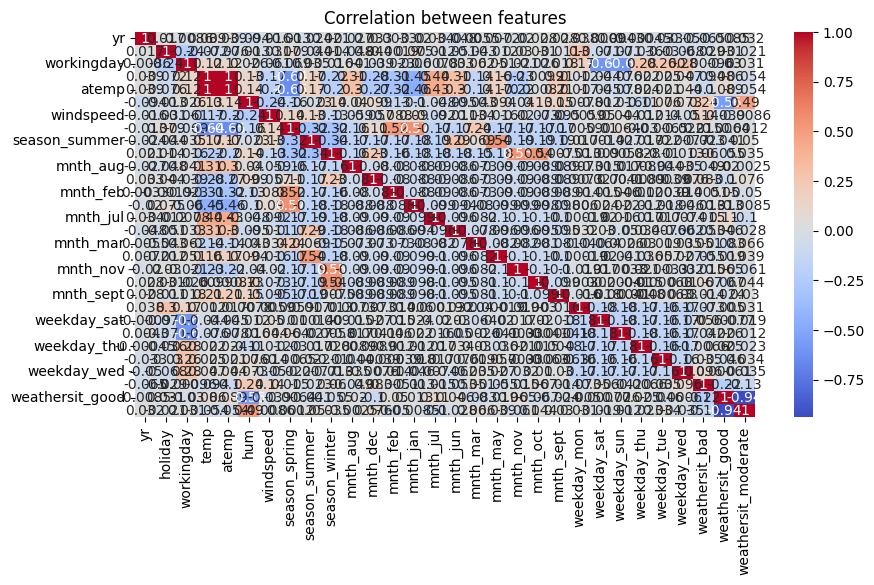

In [2521]:
#Using heatmap to check the correlation between the features for the train data
plt.figure(figsize=(10,5))
plt.title('Correlation between features')
sns.heatmap(X_train.corr(),annot=True, cmap='coolwarm')
plt.show()

In [2522]:
# Let us Scale the Continuous variables
from sklearn.preprocessing import MinMaxScaler
numeric_cols = ['atemp', 'hum', 'windspeed', 'temp']
scaler = MinMaxScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

X_train.head()



,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,False,False,True,...,False,False,False,False,True,False,False,False,False,True
645,1,1,0,0.403972,0.404998,0.731215,0.419004,False,False,True,...,False,True,False,False,False,False,False,False,False,True
163,0,0,1,0.717562,0.685963,0.509660,0.708724,False,True,False,...,False,True,False,False,False,False,False,False,True,False
360,0,0,1,0.331287,0.326273,0.785745,0.415925,True,False,False,...,False,False,False,False,False,True,False,False,False,True
640,1,0,1,0.745598,0.682653,0.817947,0.110593,False,False,True,...,False,False,False,False,False,False,True,False,False,True


# Model Building

In [2523]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a Linear Regression object
linReg = LinearRegression()
linReg.fit(X_train, y_train)


LinearRegression()

In [2524]:
# cut down the number of features to 15
from sklearn.feature_selection import RFE

rfe = RFE(estimator=linReg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [2525]:
# Coloumn selected and there weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))



[('yr', np.True_, np.int64(1)),
 ('holiday', np.False_, np.int64(3)),
 ('workingday', np.False_, np.int64(2)),
 ('temp', np.True_, np.int64(1)),
 ('atemp', np.True_, np.int64(1)),
 ('hum', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('season_spring', np.True_, np.int64(1)),
 ('season_summer', np.False_, np.int64(12)),
 ('season_winter', np.True_, np.int64(1)),
 ('mnth_aug', np.False_, np.int64(7)),
 ('mnth_dec', np.True_, np.int64(1)),
 ('mnth_feb', np.False_, np.int64(9)),
 ('mnth_jan', np.False_, np.int64(15)),
 ('mnth_jul', np.True_, np.int64(1)),
 ('mnth_jun', np.False_, np.int64(16)),
 ('mnth_mar', np.True_, np.int64(1)),
 ('mnth_may', np.False_, np.int64(5)),
 ('mnth_nov', np.True_, np.int64(1)),
 ('mnth_oct', np.False_, np.int64(6)),
 ('mnth_sept', np.True_, np.int64(1)),
 ('weekday_mon', np.False_, np.int64(11)),
 ('weekday_sat', np.True_, np.int64(1)),
 ('weekday_sun', np.False_, np.int64(10)),
 ('weekday_thu', np.False_, np.int64(14)),
 ('weekday_tue', np.

In [2526]:
# Function to build a model using statsmodel.api
import statsmodels.api as sm
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols]) # adding a constant
    model = sm.OLS(y_train,X_train_sm).fit()
    print(model.summary())
    return model

In [2527]:
# Function to calculate the VIF and print them -Take the coloumn names for which VIF needs to be calculated as an argument
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(cols):
    df = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    print(vif.sort_values(by='VIF',ascending=False))

In [2528]:
#columns selected by RFE
X_train.columns[rfe.support_]

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [2529]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'season_summer', 'mnth_aug', 'mnth_feb',
       'mnth_jan', 'mnth_jun', 'mnth_may', 'mnth_oct', 'weekday_mon',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed',
       'weathersit_moderate'],
      dtype='object')

In [2530]:
# take 15 features selected by RFE
X_train_rfe =  X_train[X_train.columns[rfe.support_]] 
print(X_train_rfe.shape)
print(X_train_rfe.columns)
print(X_train.info())

(511, 15)
Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 511 entries, 683 to 102
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   511 non-null    int64  
 1   holiday              511 non-null    int64  
 2   workingday           511 non-null    int64  
 3   temp                 511 non-null    float64
 4   atemp                511 non-null    float64
 5   hum                  511 non-null    float64
 6   windspeed            511 non-null    float64
 7   season_spring        511 non-null    bool   
 8   season_summer        511 non-null    bool   
 9   season_winter        511 non-null    bool   
 10  mnth_aug             511 non-null    bool   
 11 

In [2531]:
# Convert boolean columns to integers
X_train = X_train.astype({col: 'int' for col in X_train.select_dtypes('bool').columns})

### Algo to remove the variable based on result
 High p-value high VIF -- No brainer this will be the first priority to remove
 High-low:
        High p Low VIF -- Will going to remove this first
        Low P High VIF -- remove thise after the one above
 Low p-Value Low VIF

## Model-1

In [2532]:
# Define the columns to be used for building the model and calculating VIF
model1 = ['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good']

# Build the model and calculate VIF
olsModel1 = build_model(model1)
calc_vif(model1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     171.5
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          5.72e-185
Time:                        14:53:45   Log-Likelihood:                -4126.6
No. Observations:                 511   AIC:                             8285.
Df Residuals:                     495   BIC:                             8353.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2693.1493    342.442     

## Model-2

In [2533]:
# Dropping temp column as it has high P-value
cols_to_drop = ['temp']
model2 = ['yr', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good']

# Build the model and calculate VIF
olsModel2 = build_model(model2)
calc_vif(model2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     184.1
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          4.16e-186
Time:                        14:53:45   Log-Likelihood:                -4126.6
No. Observations:                 511   AIC:                             8283.
Df Residuals:                     496   BIC:                             8347.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2692.3562    341.992     

### Model-3

In [2534]:
# Dropping weekday_sat column as it has high P-value
cols_to_drop = ['windspeed',]
model3 = ['yr', 'atemp', 'hum',  'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good']
# Build the model and calculate VIF
olsModel3 = build_model(model3)
calc_vif(model3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     189.4
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          5.73e-183
Time:                        14:53:45   Log-Likelihood:                -4136.8
No. Observations:                 511   AIC:                             8302.
Df Residuals:                     497   BIC:                             8361.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1853.8002    292.223     

### Model-4

In [2535]:
# Dropping weekday_sat column as it has high P-value
cols_to_drop = ['weekday_sat',]
model4 = ['yr', 'atemp', 'hum',  'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept',  'weathersit_bad', 'weathersit_good']
# Build the model and calculate VIF
olsModel4 = build_model(model4)
calc_vif(model4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     204.7
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          9.53e-184
Time:                        14:53:45   Log-Likelihood:                -4137.7
No. Observations:                 511   AIC:                             8301.
Df Residuals:                     498   BIC:                             8357.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1894.3400    290.877     

### Model-5

In [2536]:
# Dropping hum column as it has high VIF
cols_to_drop = ['hum',]
model5 = ['yr', 'atemp',  'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept',  'weathersit_bad', 'weathersit_good']
# Build the model and calculate VIF
olsModel5 = build_model(model5)
calc_vif(model5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.0
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          5.46e-183
Time:                        14:53:45   Log-Likelihood:                -4142.3
No. Observations:                 511   AIC:                             8309.
Df Residuals:                     499   BIC:                             8359.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1281.1104    209.107     

Here VIF is well below the limit and features having p value less that .005 and R2 is .82. We finalize the model to use further. Will going to use the olsModel5 for further calculation

In [2537]:
# Will use the varibale of model5 and lets get the intercept and coefficients
X_train_sm = sm.add_constant(X_train[model5]) # adding a constant
boomBikeSugestedModel = sm.OLS(y_train,X_train_sm).fit()


### Residual Analysis

Text(0.5, 0, 'Errors')

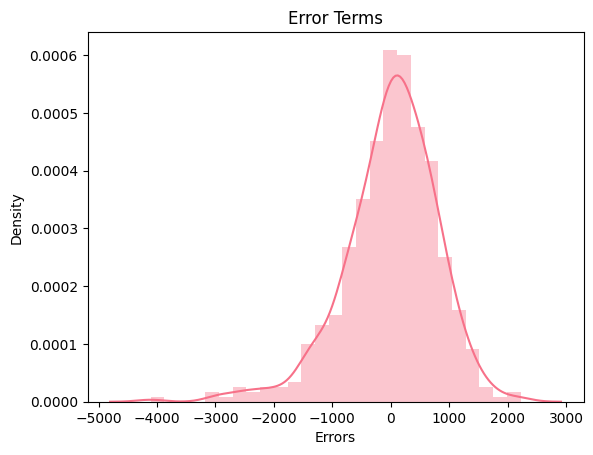

In [2538]:
y_train_pred = boomBikeSugestedModel.predict(X_train_sm)
# Plot the residuals
sns.distplot(y_train - y_train_pred)
plt.title('Error Terms')
plt.xlabel('Errors')

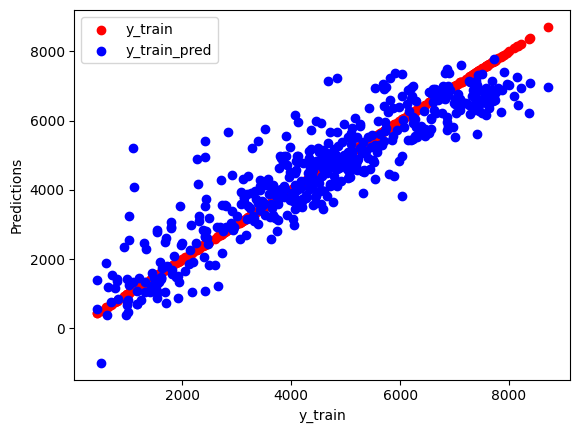

In [2539]:
# Actual vs Predicted
# y_train as blue and y_train_pred as red
plt.scatter(y_train, y_train, color='red', label='y_train')
plt.scatter(y_train, y_train_pred, color='blue', label='y_train_pred')
plt.xlabel('y_train')
plt.ylabel('Predictions')
plt.legend()
plt.show()


## Model Prediction

In [2540]:
# calculate the R-squared value on the train set
r2 = r2_score(y_train, y_train_pred)
print(r2)

0.8283969766748485


### Prediction of Value on test dataset

In [2541]:
numeric_cols = ['atemp', 'hum', 'windspeed', 'temp']
# will not fit the test date only Scale the test data
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


In [2542]:
#Predict the test data values
X_test_sm = sm.add_constant(X_test[model5])
y_test_pred = boomBikeSugestedModel.predict(X_test_sm)


### R-squared value of test predicted

In [2543]:
# calculate the R-squared value on the test set
r2 = r2_score(y_test, y_test_pred)
print(r2)
#R2 value is 0.81 which is good

-0.8809588502574017


<Axes: ylabel='Density'>

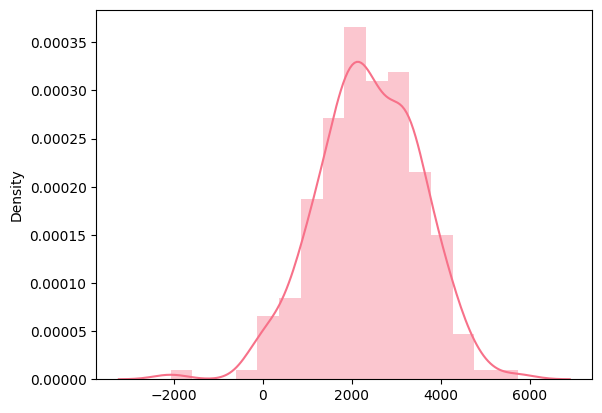

In [2544]:
# Plot the residuals
sns.distplot(y_test - y_test_pred)

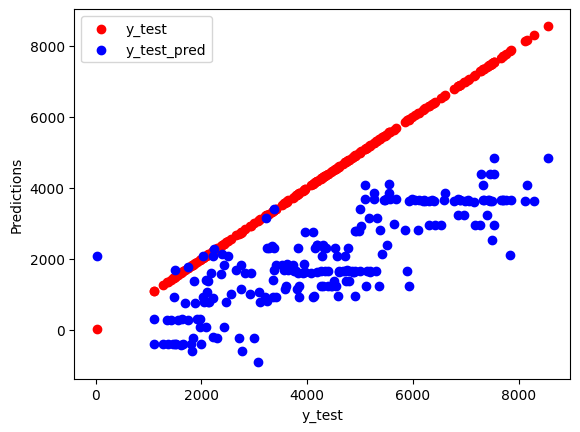

In [2545]:
# Actual vs Predicted
# y_test as blue and y_test_pred as red
plt.scatter(y_test, y_test, color='red', label='y_test')
plt.scatter(y_test, y_test_pred, color='blue', label='y_test_pred')
plt.xlabel('y_test')
plt.ylabel('Predictions')
plt.legend()
plt.show()

In [2546]:
# Finaly Summary of the model
print(boomBikeSugestedModel.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.0
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          5.46e-183
Time:                        14:53:45   Log-Likelihood:                -4142.3
No. Observations:                 511   AIC:                             8309.
Df Residuals:                     499   BIC:                             8359.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1281.1104    209.107     

In [2547]:
# Conclusion
# R2 value is 0.81 which is good and the model is able to explain 81% of the variance in the target variable
# The p-values of the coefficients are less than 0.05
# The VIF values are less than 5
# The residuals are normally distributed
# The actual vs predicted values are linearly related

#Significant variables are
#1. atemp
#2. yr
#3. Season(Spring, Winter)
#4. Month(Dec, Jul, Mar, Nov, Sept)
#5. WeatherSit(Bad, Good)
#6. Humidity
